In [ ]:
import pandas as pd

medicamentos = pd.read_csv("Base.csv")

In [ ]:
lista_doencas = list(['hipertensão', 'asma', 'diabetes', 'colesterol','câncer','depressão', 'ansiedade'])
print(lista_doencas)


['hipertensão', 'asma', 'diabetes', 'colesterol', 'câncer', 'depressão', 'ansiedade']


In [ ]:
def estaPresente (lista_doencas,dataframe,nome_medicamentos):
  for doenca in lista_doencas:
    coluna = list()
    for linha in dataframe[nome_medicamentos]:
      if doenca in linha:
        coluna.append(1)
      else:
       coluna.append(0)
    dataframe[doenca] = coluna
estaPresente(lista_doencas,medicamentos,"Classificação")


In [ ]:
lista_juntar = list(zip(medicamentos[lista_doencas[0]],medicamentos[lista_doencas[1]],medicamentos[lista_doencas[2]],medicamentos[lista_doencas[3]],medicamentos[lista_doencas[4]],
                        medicamentos[lista_doencas[5]],medicamentos[lista_doencas[6]]))
medicamentos["Todas"] = lista_juntar

medicamentos.sample(55)

,Medicamentos,Descrição,Classificação,ansiedade,hipertensão,asma,diabetes,colesterol,câncer,depressão,Todas
18,Haar-intern,O Haar-intern é um medicamento destinado ao tr...,suplemento vitaminico,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
13,MabThera,O MabThera é um remédio indicado para o tratam...,"linfoma não Hodgkin, artrite reumatóide, leuce...",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
53,Aspirina C,Aspirina C efervescente é um analgésico (dore...,"dor de cabeça, dor de dente, dor causada por i...",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
10,Paclitaxel,O Paclitaxel é indicado nas seguintes situaçõe...,"câncer de mama, câncer de pumão, carcinoma de ...",0,0,0,0,0,1,0,"(0, 0, 0, 0, 1, 0, 0)"
19,Gaballon,Gaballon - Este medicamento é indicado no trat...,"cansaço físico, mental, anorexia.",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
9,Qlaira,Rafex está indicado como anti-histamínico no t...,anticoncepcional,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
31,Xeljanz,Xeljanz é indicado para o tratamento da artrit...,artrite reumatoide,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
22,dacarbazina,A dacarbazina é indicada no tratamento de mela...,melanoma maligno metastático,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
45,Artrodar,Artrodar - A diacereína é indicada no tratamen...,osteoartrose,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"
42,Buscopan,Buscopan drágeas ou gotas é indicado para o al...,"dores,cólica,desconforto abdominal",0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0)"


In [ ]:
%%capture
!pip install unidecode

In [ ]:
import re
import string
from urllib import request
from bs4 import BeautifulSoup
from unidecode import unidecode

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
from nltk.stem.rslp import *
from nltk.stem import PorterStemmer 
nltk.download('rslp')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess(text:str)->str:

  html = BeautifulSoup(text,"lxml").get_text()
  marks = re.sub(r"[\r\n\t\xa0|'-]", ' ', html)
  spacing = re.sub(' +', ' ', marks)
  sentences = nltk.sent_tokenize(spacing)
  lower = [i.lower() for i in sentences]
  http = [re.sub(r'http\S+', '', i) for i in lower]
  punct = [re.sub(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', i) for i in http]
  num = [re.sub(r"[0-9]", '#num', i) for i in punct]
  accen = [unidecode(i) for i in num]

  return accen

In [ ]:
col = pd.read_csv('Base.csv')
content = str(col['Classificação'])
file=open('my_file.txt')

In [ ]:
test = preprocess(file)

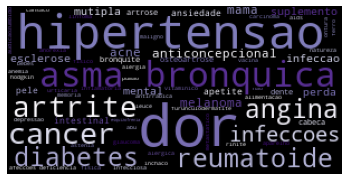

In [ ]:
stoplist = set(stopwords.words('portuguese'))
stoplist.update(['num', 'link'])
wcl = WordCloud(stopwords=stoplist, colormap="Purples", background_color="black", width=300, height=150)
plt.imshow(wcl.generate(str(test)))
plt.axis('off');

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


med_train, med_test, clas_train, clas_test = train_test_split(medicamentos.Descrição, medicamentos.Todas, test_size=0.30)

In [ ]:
tfidf_vec = TfidfVectorizer(max_df=0.85)
fit_tfidf = tfidf_vec.fit(medicamentos.Descrição)
med_train_tfidf = fit_tfidf.transform(med_train)
med_test_tfidf = fit_tfidf.transform(med_test)


In [ ]:
import numpy as np

train_array = np.asarray(list(clas_train))
test_array = np.asarray(list(clas_test))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
classificador_onevsrest = OneVsRestClassifier(regressao_logistica)
classificador_onevsrest.fit(med_train_tfidf , train_array)
resultado_onevsrest = classificador_onevsrest.score(med_test_tfidf, test_array)
print("Resultado {0: .2f}%".format(resultado_onevsrest*100))

Resultado  64.71%
